# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [11]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [13]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,662,87,41,66,140,58,6,148,46,19,136,164,318,178,79,19,2,181,185
1,127,85,41,66,155,65,22,149,45,19,139,173,330,155,75,6,16,184,191
2,612,80,34,42,110,57,3,114,59,17,119,131,191,121,87,4,7,179,183
3,791,86,43,68,150,64,9,138,48,18,143,161,285,174,69,6,0,192,201
4,394,90,49,83,187,63,7,176,37,21,154,205,467,222,70,1,2,189,195
5,279,94,37,73,186,71,7,154,42,19,127,171,362,132,67,2,8,197,206
6,254,93,47,85,161,65,12,155,43,19,157,179,354,178,76,2,9,184,196
7,184,103,46,106,209,66,10,203,33,23,149,217,612,210,70,9,10,191,199
8,609,87,42,60,116,51,6,150,46,19,141,169,324,171,85,2,14,178,182
9,217,104,57,103,216,69,11,219,30,25,176,228,708,219,73,4,3,186,196


Methods `describe` and `info` deliver some useful information.

In [14]:
#@title
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000
mean,417.435337,94.047359,45.054645,82.717668,169.646630,61.794171,8.714026,170.315118,40.588342,20.693989,148.550091,190.027322,447.61020,175.819672,72.664845,6.357013,12.586521,188.794171,195.45173
std,246.051798,8.268396,6.198122,15.670026,33.276475,7.988100,4.877346,33.683599,7.795629,2.637666,14.533869,31.892858,180.04209,33.048823,7.682848,4.933874,8.636743,6.004521,7.36335
min,0.000000,73.000000,34.000000,42.000000,109.000000,47.000000,2.000000,114.000000,26.000000,17.000000,119.000000,131.000000,191.00000,109.000000,59.000000,0.000000,0.000000,176.000000,181.00000
25%,206.000000,88.000000,40.000000,70.000000,142.000000,57.000000,7.000000,148.000000,33.000000,19.000000,137.000000,168.000000,323.00000,150.000000,68.000000,2.000000,6.000000,184.000000,190.00000
50%,410.000000,93.000000,45.000000,81.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,147.000000,179.000000,366.00000,174.000000,72.000000,5.000000,11.000000,188.000000,196.00000
75%,639.000000,100.000000,50.000000,98.000000,196.000000,66.000000,10.000000,201.000000,46.000000,23.000000,160.000000,218.000000,602.00000,199.000000,76.000000,10.000000,19.000000,193.000000,201.00000
max,845.000000,119.000000,58.000000,112.000000,333.000000,138.000000,55.000000,265.000000,59.000000,29.000000,182.000000,320.000000,1018.00000,268.000000,135.000000,22.000000,39.000000,204.000000,211.00000


In [15]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [16]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [19]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import scikitplot as skplt
import matplotlib.pyplot as plt
import numpy as np

logreg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=1000)

param_grid = {'C': [0.1, 1.0, 10, 15, 20, 30, 50, 100, 150, 200, 500, 1000] }

grid = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)
grid_result = grid.fit(X_train, y_train)
print('Best parameters: ', grid_result.best_params_)

logreg = LogisticRegression(C=grid_result.best_params_['C'], multi_class='multinomial', solver='saga', tol=1e-3, max_iter=1000)

clg = logreg.fit(X_train_sc, y_train)
print("Accuracy test score: ", clg.score(X_test_sc, y_test))

y_pred = logreg.predict(X_test_sc)
print(classification_report(y_test, y_pred))


Best parameters:  {'C': 0.1}
Accuracy test score:  0.7272727272727273
              precision    recall  f1-score   support

         bus       0.82      0.93      0.87        71
        opel       0.84      0.42      0.56        89
        saab       0.54      0.68      0.60        72
         van       0.77      0.98      0.86        65

    accuracy                           0.73       297
   macro avg       0.75      0.75      0.73       297
weighted avg       0.75      0.73      0.71       297



In [18]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

! pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


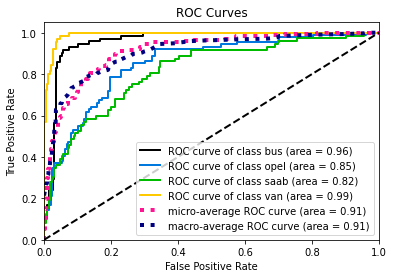

In [21]:
y_probas = logreg.predict_proba(X_test_sc)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

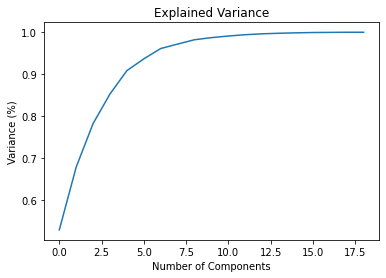

In [23]:
### YOUR CODE HERE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=[0, 1])

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

pca = PCA().fit(X_train_sc)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [37]:
### YOUR CODE HERE
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

The best parameters are {'logisticregression__C': 0.615848211066026, 'logisticregression__l1_ratio': 0.0, 'logisticregression__penalty': 'elasticnet'}
Accuracy score for testing data:  0.6801346801346801
f1 macro score for testing data:  0.6815280724674575
f1 weighted score for testing data:  0.6667779810503287


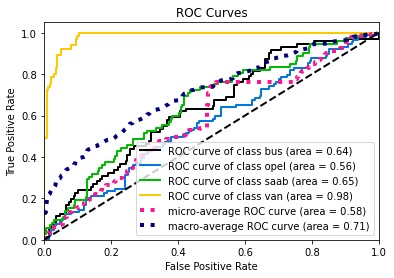

In [38]:
### YOUR CODE HERE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import scikitplot

def get_best_and_plotting(base_estimator, param_grid, X_train, y_train, X_test, y_test):
    clf = GridSearchCV(base_estimator, param_grid, cv=5).fit(X_train, y_train)

    print("The best parameters are %s" % (clf.best_params_))
    print("Accuracy score for testing data: ", clf.score(X_test, y_test))
    y_predicted = clf.predict(X_test)
    print("f1 macro score for testing data: ", f1_score(y_test, y_predicted, average='macro'))
    print("f1 weighted score for testing data: ", f1_score(y_test, y_predicted, average='weighted'))
    
    predicted_proba = clf.predict_proba(X_test_sc)
    scikitplot.metrics.plot_roc(y_test, predicted_proba)
    plt.show()

param_grid = {'logisticregression__C': np.logspace(-4, 4, 20),
              'logisticregression__l1_ratio': np.linspace(0, 1, 11),
              'logisticregression__penalty': ['elasticnet']}

logreg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=1000)
pipeline = make_pipeline(StandardScaler(), pca, logreg)

get_best_and_plotting(pipeline, param_grid, X_train, y_train, X_test, y_test)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [39]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
decTree = DecisionTreeClassifier(random_state=0)

param_grid = {'max_depth': [1, 2, 4, 8, 16, 32, 64, 128, 25, 80]}
              
grid = GridSearchCV(estimator=decTree,
                    param_grid=param_grid, 
                    cv=5)

grid_result = grid.fit(X_train_pca, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

#Mesure
decTree = DecisionTreeClassifier(max_depth=grid_result.best_params_['max_depth'])

clg = decTree.fit(X_train_pca, y_train)
print("Accuracy test score: ", clg.score(X_test_pca, y_test))

y_pred = decTree.predict(X_test_pca)
print(classification_report(y_test, y_pred))

Best Score:  0.6430525437864887
Best Params:  {'max_depth': 8}
Accuracy test score:  0.632996632996633
              precision    recall  f1-score   support

         bus       0.76      0.76      0.76        71
        opel       0.64      0.51      0.57        89
        saab       0.45      0.54      0.49        72
         van       0.72      0.77      0.75        65

    accuracy                           0.63       297
   macro avg       0.64      0.64      0.64       297
weighted avg       0.64      0.63      0.63       297



#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [42]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

def bagging(base_estimator, X_train, y_train, X_test, y_test, est_name):
    num_estimators = np.arange(2, 100, 5, dtype=np.int16) 
    n_count = len(num_estimators)

    acc_test_score = np.zeros(n_count)
    f1_macro_test_score = np.zeros(n_count)
    f1_weighted_test_score = np.zeros(n_count)

    for i in range(n_count):
        clf = BaggingClassifier(base_estimator, n_estimators=num_estimators[i]).fit(X_train_sc, y_train)
        acc_test_score[i] = clf.score(X_test, y_test)
        y_predicted = clf.predict(X_test)
        f1_macro_test_score[i] = f1_score(y_test, y_predicted, average='macro')
        f1_weighted_test_score[i] = f1_score(y_test, y_predicted, average='weighted')

    plt.figure(figsize=(12, 8))
    plt.plot(num_estimators, acc_test_score, label='accuracy score')
    plt.xlabel("Number of estimators", fontsize=14)
    plt.ylabel("Score", fontsize=14)
    plt.legend(fontsize=14)
    plt.ylim(0.6, 0.9)
    plt.title("Bagging scores on " + est_name, fontsize=18)
    plt.show()

    plt.figure(figsize=(12, 8))    
    plt.plot(num_estimators, f1_macro_test_score, label='f1 macro score')
    plt.xlabel("Number of estimators", fontsize=14)
    plt.ylabel("Score", fontsize=14)
    plt.legend(fontsize=14)
    plt.ylim(0.6, 0.9)
    plt.title("Bagging scores on " + est_name, fontsize=18)

    plt.figure(figsize=(12, 8))    
    plt.plot(num_estimators, f1_weighted_test_score, label='f1 weighted score')
    plt.xlabel("Number of estimators", fontsize=14)
    plt.ylabel("Score", fontsize=14)
    plt.legend(fontsize=14)
    plt.ylim(0.6, 0.9)
    plt.title("Bagging scores on " + est_name, fontsize=18)
    print("Optimal number of algorithms: ", num_estimators[np.argmax(acc_test_score)])

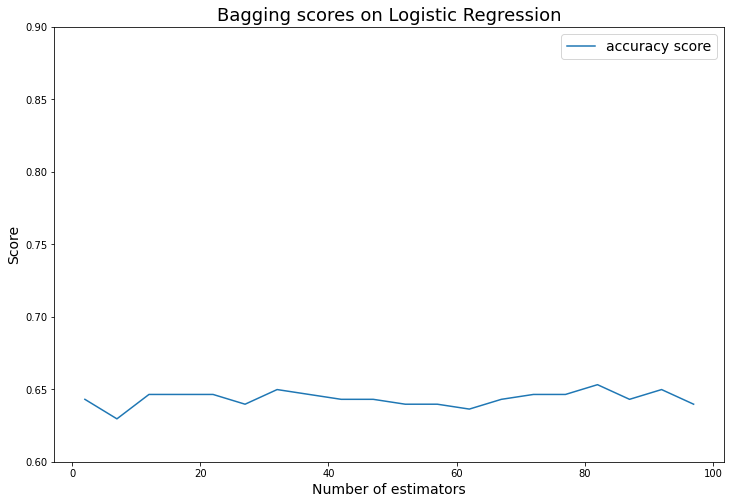

Optimal number of algorithms:  82


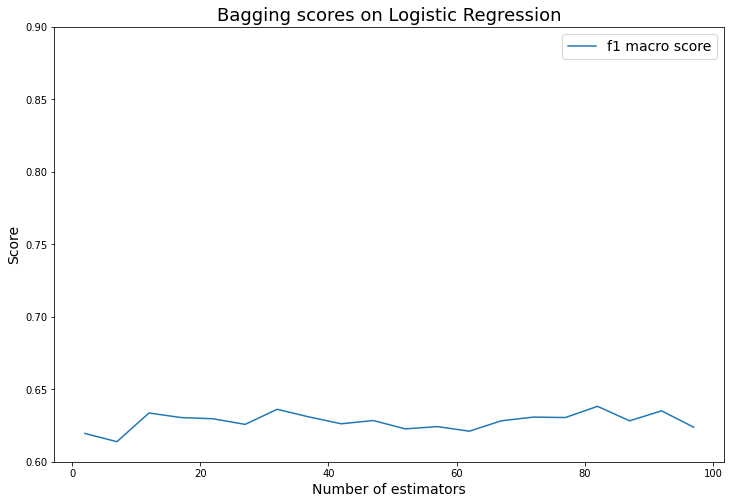

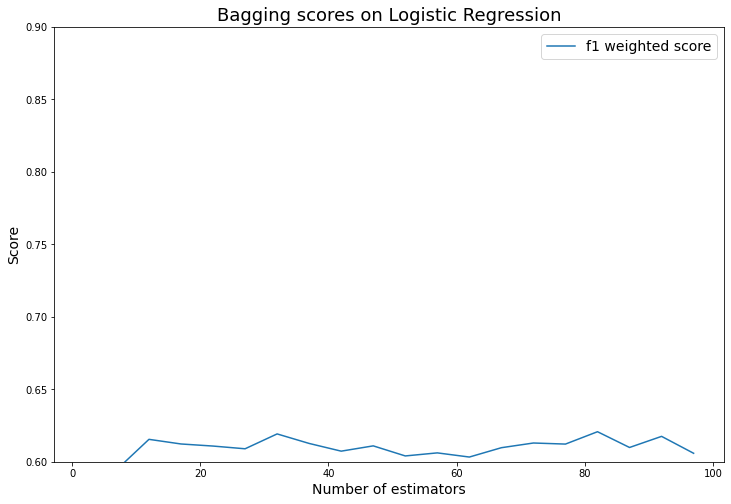

In [58]:
lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=1000,
                        C=0.6158, l1_ratio=0.9, penalty='elasticnet')
bagging(lr, X_train_sc, y_train, X_test_sc, y_test, "Logistic Regression")

The ensemble score does not improve as the number of algorithms increases since it is dependent.
The ratings for the various algorithms vary just little.
This is due to logistic regression being a low variance model, and low variance models do not perform well with bagging. 

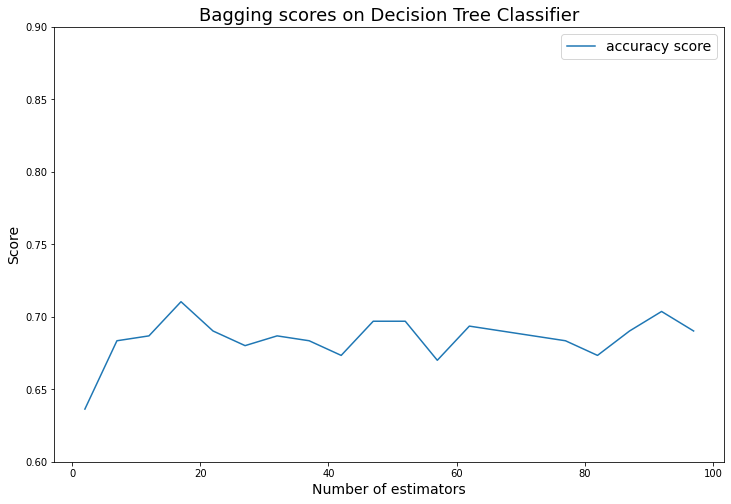

Optimal number of algorithms:  17


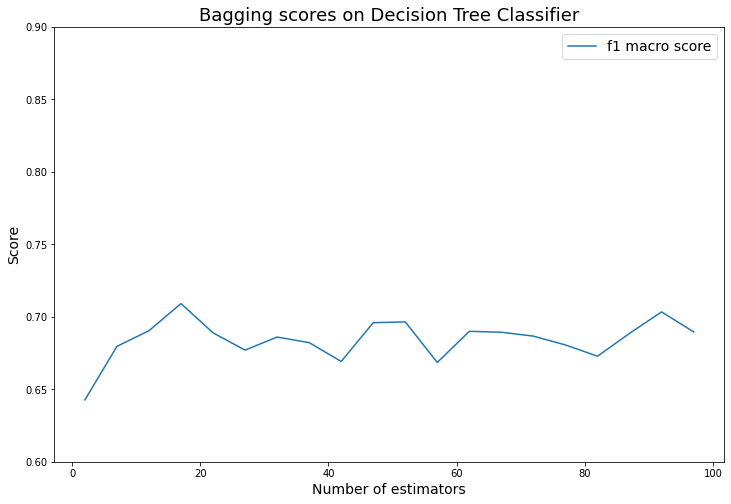

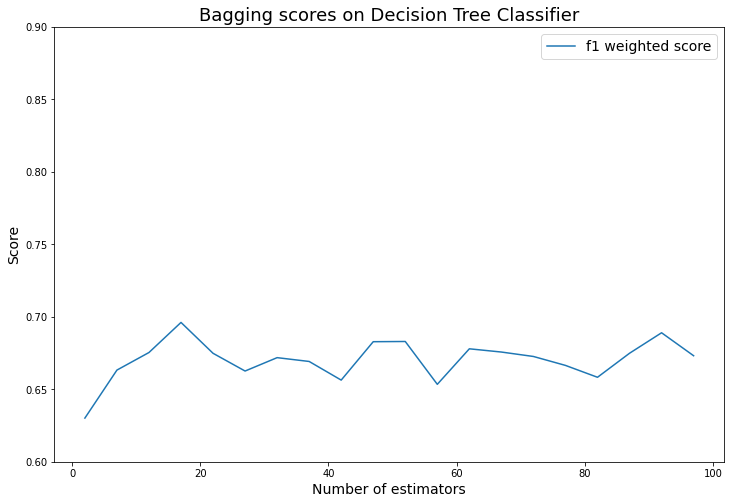

In [56]:
Tree_clf = DecisionTreeClassifier(random_state=42, max_depth=8, min_samples_leaf=5, criterion='entropy')
bagging(Tree_clf, X_train_sc, y_train, X_test_sc, y_test, "Decision Tree Classifier")

Decision Tree does not cease improving till it achieves high performance on the training dataset, and this issue leads to overfitting, resulting in low accuracy on the testing dataset.
Bagging will lessen the disparity between training and test accuracy.
And the accuracy of testing data improves as the number of estimators increases. 

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

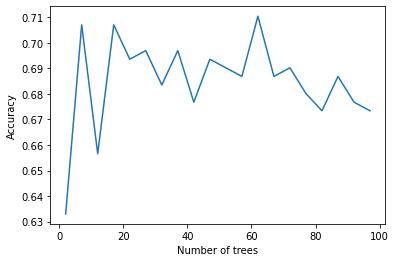

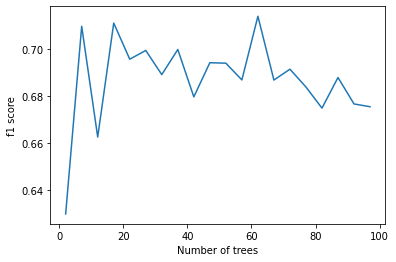

In [47]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

num_estimators = np.arange(2, 100, 5, dtype=np.int16) 
num_of_trees = list(range(2, 100, 5))
accuracy_rf = []
f1_rf = []

for n_estimators in num_of_trees:
    random_forest_clf = RandomForestClassifier(n_estimators=n_estimators)
    random_forest_clf.fit(X_train, y_train)
    
    acc = random_forest_clf.score(X_test, y_test)
    accuracy_rf.append(acc)
    
    y_pred = random_forest_clf.predict(X_test)
    f1_sc = f1_score(y_test, y_pred, average="macro")
    f1_rf.append(f1_sc)

plt.plot(num_estimators, accuracy_rf)
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.show()

plt.plot(num_estimators, f1_rf)
plt.xlabel("Number of trees")
plt.ylabel("f1 score")
plt.show()

The optimal number of trees is bigger than the optimal number of logistic regressions/decision trees in 2.6

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [48]:
# YOUR CODE HERE

def training(base_estimator, X_train, y_train, X_test, y_test, est_name):
    acc_test_score = np.zeros(10)
    f1_macro_test_score = np.zeros(10)
    f1_weighted_test_score = np.zeros(10)

    for i in range(10):
        dataset_size = int(X_train.shape[0] * (i + 1) / 10)
        clf = base_estimator.fit(X_train[:dataset_size], y_train[:dataset_size])
        acc_test_score[i] = clf.score(X_test, y_test)
        y_predicted = clf.predict(X_test)
        f1_macro_test_score[i] = f1_score(y_test, y_predicted, average='macro')
        f1_weighted_test_score[i] = f1_score(y_test, y_predicted, average='weighted')
    
    plt.figure(figsize=(12, 8))
    plt.plot(np.arange(10), acc_test_score, label='accuracy score')
    plt.xlabel("Dataset size", fontsize=14)
    plt.ylabel("Score", fontsize=14)
    plt.legend(fontsize=14)
    plt.title("Scores for " + est_name + " with different dataset sizes", fontsize=18)
    plt.show()

    plt.figure(figsize=(12, 8))    
    plt.plot(np.arange(10), f1_macro_test_score, label='f1 macro score')
    plt.xlabel("Dataset size", fontsize=14)
    plt.ylabel("Score", fontsize=14)
    plt.legend(fontsize=14)
    plt.title("Scores for " + est_name + " with different dataset sizes", fontsize=18)
    plt.show()

    plt.figure(figsize=(12, 8))    
    plt.plot(np.arange(10), f1_weighted_test_score, label='f1 weighted score')
    plt.xlabel("Dataset size", fontsize=14)
    plt.ylabel("Score", fontsize=14)
    plt.legend(fontsize=14)
    plt.title("Scores for " + est_name + " with different dataset sizes", fontsize=18)
    plt.show()

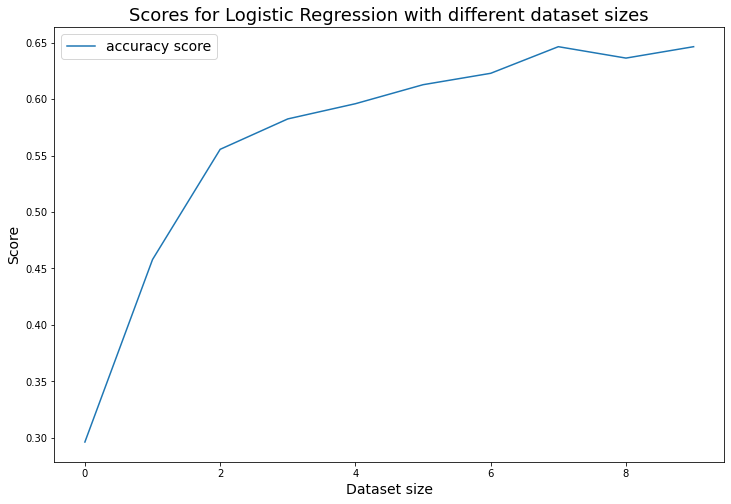

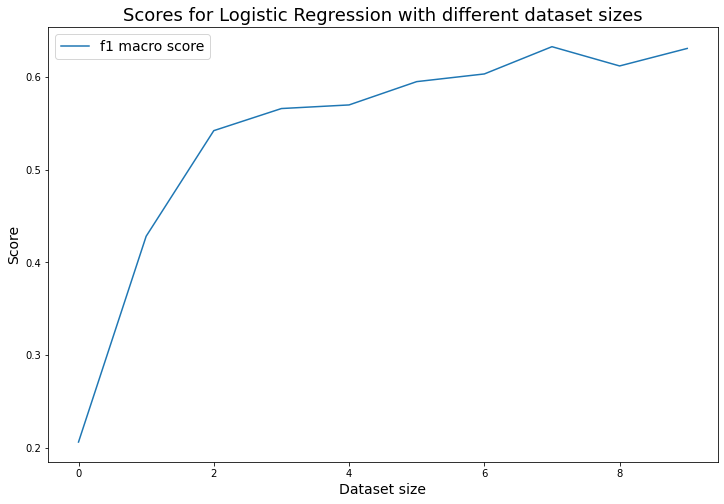

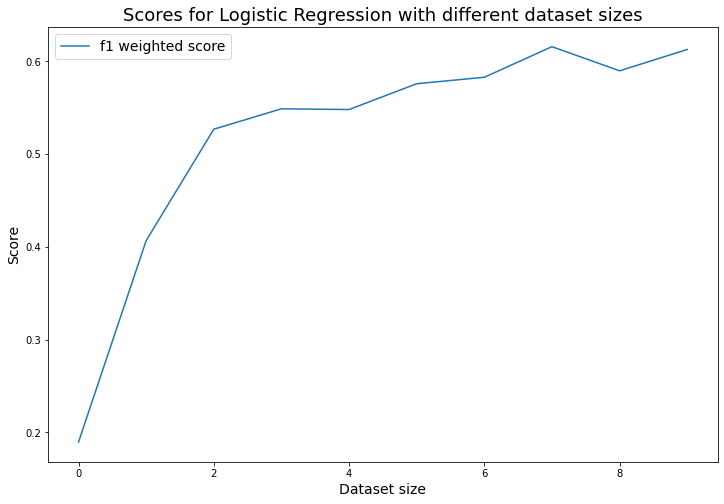

In [49]:
lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=0.6158, l1_ratio=0.9, penalty='elasticnet')
training(lr, X_train_sc, y_train, X_test_sc, y_test, 'Logistic Regression')

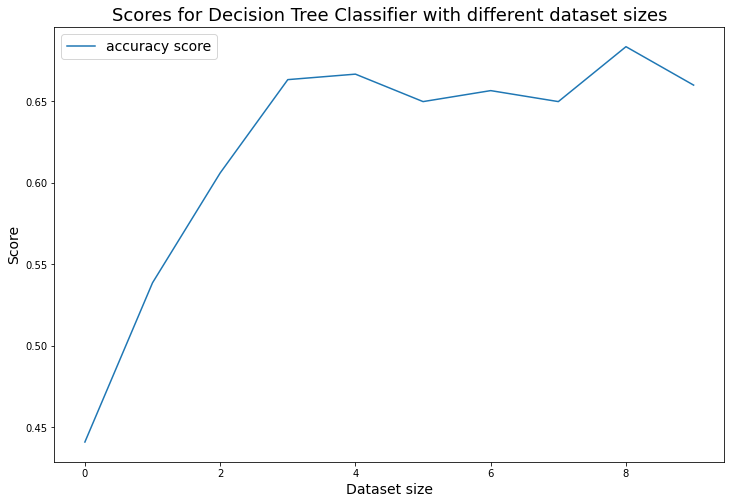

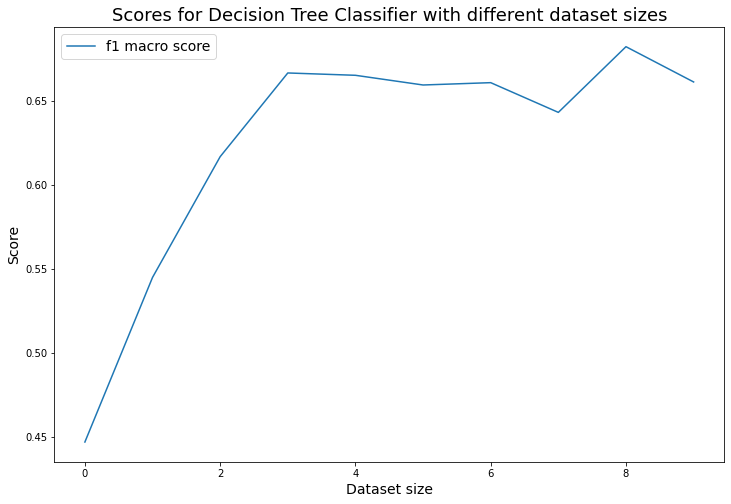

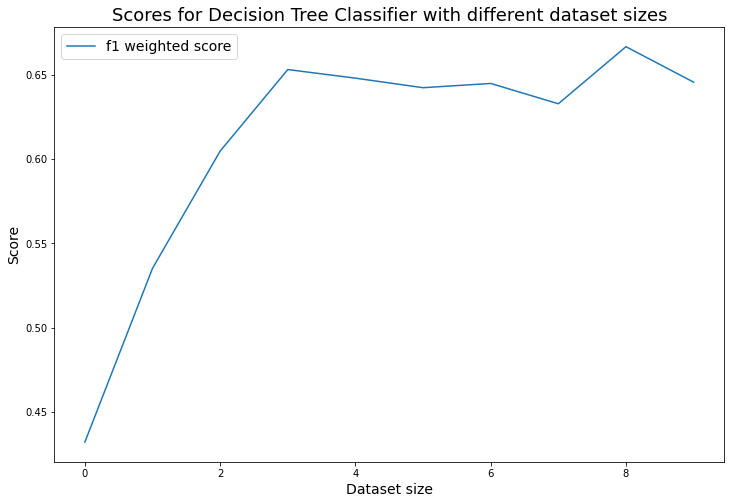

In [50]:
Tree_clf = DecisionTreeClassifier(random_state=42, max_depth=8, min_samples_leaf=5, criterion='entropy')
training(Tree_clf, X_train_sc, y_train, X_test_sc, y_test, 'Decision Tree Classifier')

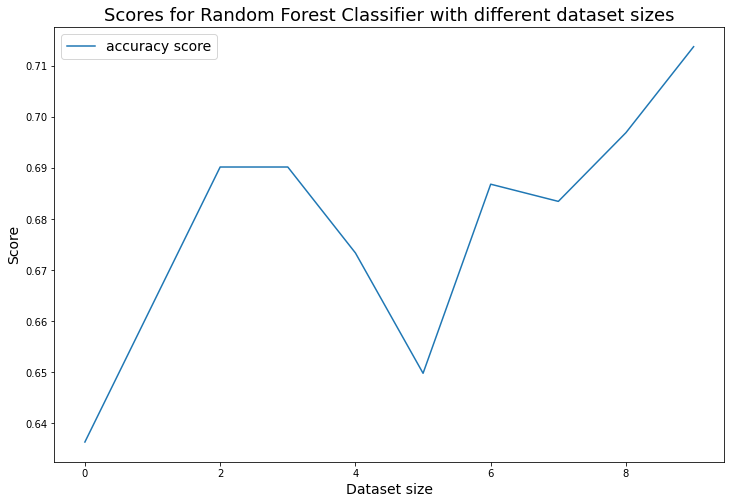

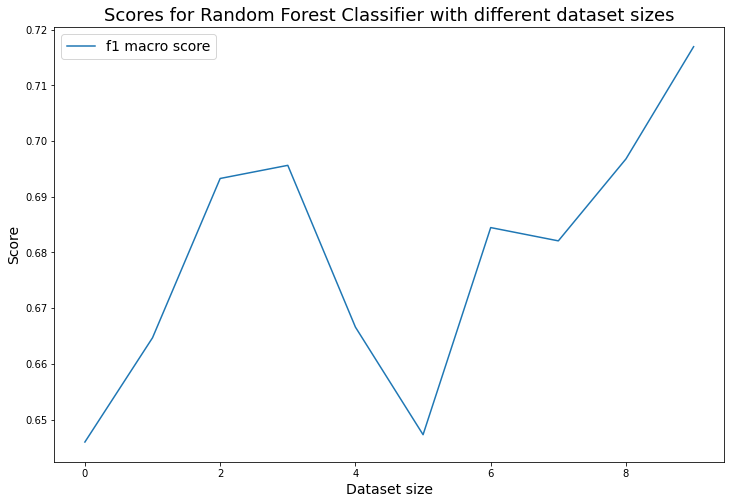

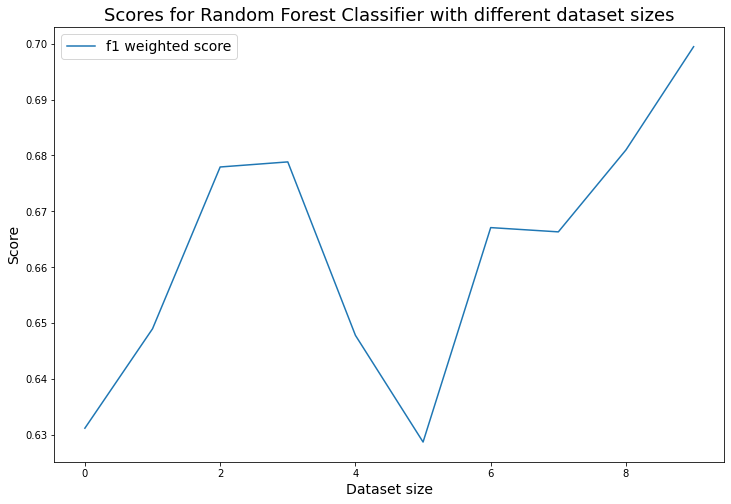

In [53]:
Forest_clf = RandomForestClassifier(random_state=42, n_estimators=52)
training(Forest_clf, X_train_sc, y_train, X_test_sc, y_test, 'Random Forest Classifier')

Conclusion: the quality of the model prediction grows with the growth of the training set